In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv("train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()
df.describe()
df['Loan_Status'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [5]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

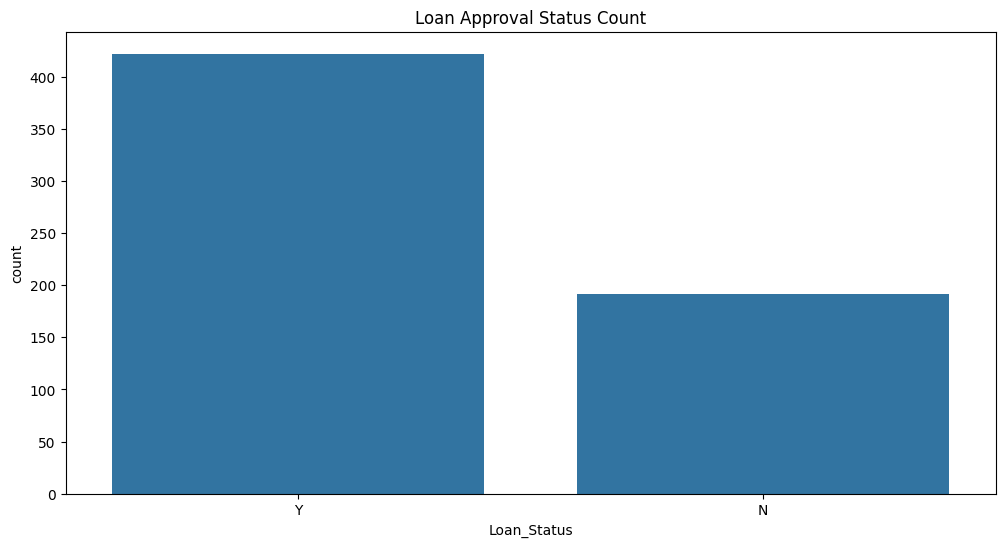

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Approval Status Count")
plt.show()


<Axes: xlabel='Education', ylabel='count'>

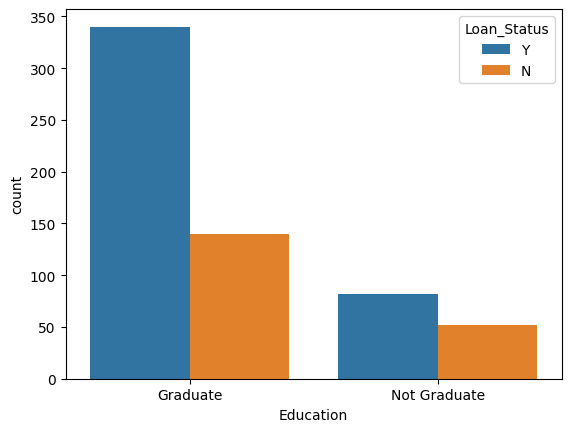

In [9]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
#sns.countplot(x='Married', hue='Loan_Status', data=df)
#sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)


<Axes: xlabel='Married', ylabel='count'>

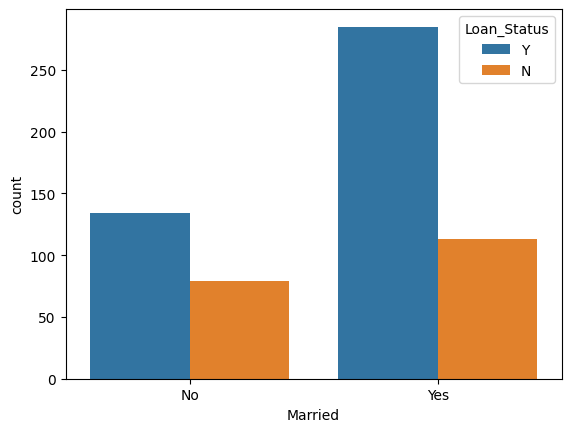

In [10]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

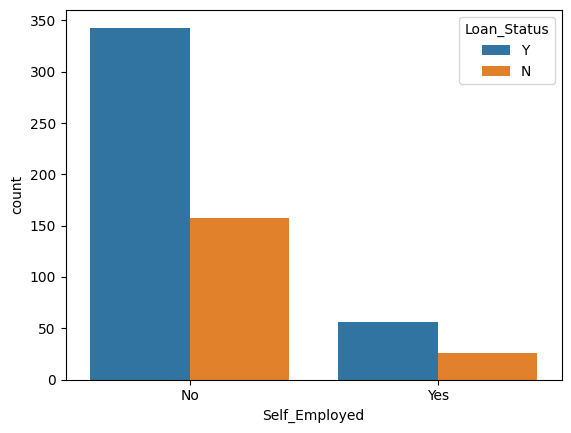

In [11]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

<Axes: >

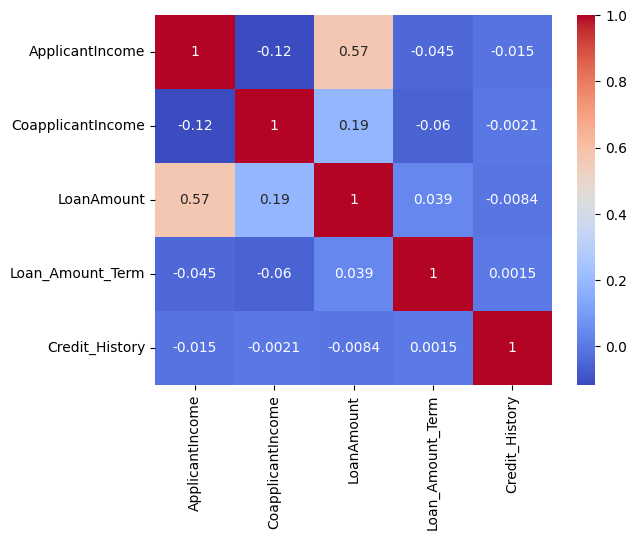

In [12]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [13]:
# Categorical - fill with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Numerical - fill with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29528/3892317905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/data/user/0/ru.iiec.pydroid3/cache/ipykernel_29528/3892317905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [14]:
# Binary map
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Convert 'Dependents' — replace '3+' with 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-hot encode Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


In [15]:
#check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
dtypes: bool(2), float64(4), in

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,True


In [17]:
# Drop Loan_ID as it’s just an identifier
df = df.drop(columns=['Loan_ID'])

# Split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8211382113821138

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        38
           1       0.84      0.92      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.76      0.78       123
weighted avg       0.82      0.82      0.81       123


Confusion Matrix:
 [[23 15]
 [ 7 78]]


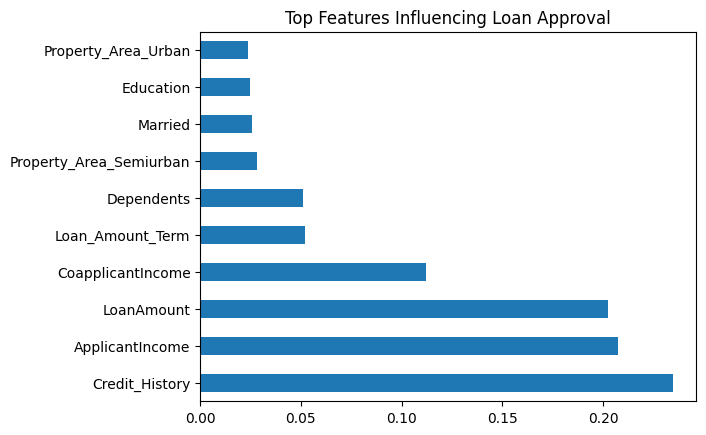

In [21]:


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Features Influencing Loan Approval")
plt.show()


In [31]:
import pickle

with open("loan_model.pkl", "wb") as file:
    pickle.dump(model, file)
    